# Linguaggi regolari e automi a stati finiti

## Generazione (Sez. 5.2)

In [1]:
from liblet import Grammar, Automaton, StateTransitionGraph

In [2]:
# fig. 5.6, pag. 142

G = Grammar.from_string("""
S -> a A
S -> a B
A -> b B
A -> b C
B -> c A
B -> c C
C -> a
""")
G

Grammar(N={A, B, C, S}, T={a, b, c}, P=(S -> a A, S -> a B, A -> b B, A -> b C, B -> c A, B -> c C, C -> a), S=S)

In [3]:
A = Automaton.from_grammar(G)
A

Automaton(N={A, B, C, S, ◇}, T={a, b, c}, transitions=(S-a->A, S-a->B, A-b->B, A-b->C, B-c->A, B-c->C, C-a->◇), F={◇}, q0=S)

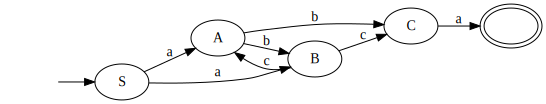

In [4]:
StateTransitionGraph.from_automaton(A)

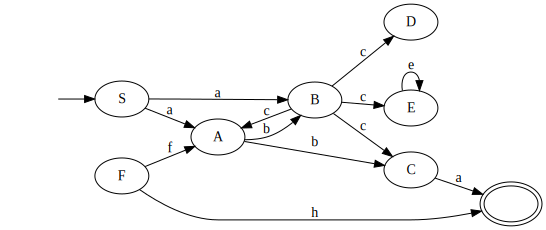

In [5]:
# pag. 143

Gp = Grammar.from_string("""
S -> a A
S -> a B
A -> b B
A -> b C
B -> c A
B -> c C
C -> a
B -> c D
B -> c E
E -> e E
F -> f A
F -> h
""")
Gp.T -= {'D'}
Gp.N |= {'D'}

StateTransitionGraph.from_automaton(Automaton.from_grammar(Gp))

## Parsing (Sez. 5.3)

### La set construction (Sez. 5.3.1)

In [6]:
from liblet import Transition, Queue, union_of

In [7]:
Ns = set()
Ts = A.T
Ss = frozenset(A.q0)

transitions = []

q = Queue([Ss])
while q:
    Xs = q.dequeue()
    if Xs in Ns: continue
    for t in Ts:
        Ys = frozenset(union_of(A.δ(X, t) for X in Xs))
        if Ys: 
            transitions.append(Transition(Xs, t, Ys))
            q.enqueue(Ys)
    Ns.add(Xs)

Fs = {Xs for Xs in Ns if A.F & Xs}

As = Automaton(Ns, Ts, transitions, Ss, Fs)
As

Automaton(N={{A, B}, {A, C}, {B, C}, {S}, {◇}}, T={a, b, c}, transitions=({S}-a->{A, B}, {A, B}-c->{A, C}, {A, B}-b->{B, C}, {A, C}-b->{B, C}, {A, C}-a->{◇}, {B, C}-c->{A, C}, {B, C}-a->{◇}), F={{◇}}, q0={S})

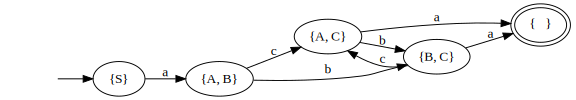

In [8]:
StateTransitionGraph.from_automaton(As, False)

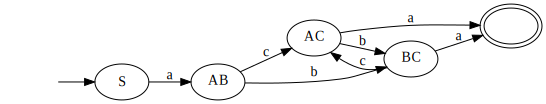

In [9]:
StateTransitionGraph.from_automaton(As)

In [10]:
from liblet import dod2table

dod = {}
for Xs in As.N - {frozenset('◇')}:
    dod[''.join(sorted(Xs))] = {t: ''.join(sorted(next(iter(As.δ(Xs, t)), ''))) for t in sorted(As.T)}

dod2table(dod)        

### Con le ε-transizioni (Sez. 5.3.2)

In [11]:
# fig. 5.14, pag. 147

A = Automaton.from_grammar(Grammar.from_string("""
S -> A
S -> a B
A -> a A
A -> ε
B -> b B
B -> b
"""))
A

Automaton(N={A, B, S, ◇}, T={a, b}, transitions=(S-ε->A, S-a->B, A-a->A, A-ε->◇, B-b->B, B-b->◇), F={◇}, q0=S)

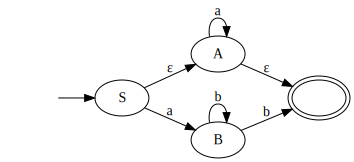

In [12]:
StateTransitionGraph.from_automaton(A)

In [13]:
from liblet import closure

@closure
def ε_closure(S, A):
    return S | {Y for X, x, Y in A.transitions if x == 'ε' and X in S}

ε_closure({'S'}, A)

{'A', 'S', '◇'}

In [14]:
Ns = set()
Ts = A.T
Ss = ε_closure(frozenset(A.q0), A)

transitions = []

q = Queue([Ss])
while q:
    Xs = q.dequeue()
    if Xs in Ns: continue
    for t in Ts:
        Ys = ε_closure(frozenset(union_of(A.δ(X, t) for X in Xs)), A)
        if Ys: 
            transitions.append(Transition(Xs, t, Ys))
            q.enqueue(Ys)
    Ns.add(Xs)

Fs = {Xs for Xs in Ns if A.F & Xs}

As = Automaton(Ns, Ts, transitions, Ss, Fs)
As

Automaton(N={{A, B, ◇}, {A, S, ◇}, {A, ◇}, {B, ◇}}, T={a, b}, transitions=({A, S, ◇}-a->{A, B, ◇}, {A, B, ◇}-b->{B, ◇}, {A, B, ◇}-a->{A, ◇}, {B, ◇}-b->{B, ◇}, {A, ◇}-a->{A, ◇}), F={{A, B, ◇}, {A, S, ◇}, {A, ◇}, {B, ◇}}, q0={A, S, ◇})

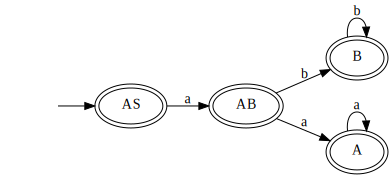

In [15]:
StateTransitionGraph.from_automaton(As)

# Homework

* Implementare l'algoritmo per la costruzione dell'*automa completo* (Sez. 5.5),
* Implementare l'algoritmo per la costruzione dell'*automa intersezione* (Sez. 5.5),
* Implementare l'algoritmo per la *minimizzazione* di un DFA (Sez. 5.7).